EVE data downloaded from
https://lasp.colorado.edu/eve/data_access/eve_data/products/level2/


In [122]:
import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch
from astropy.io import fits
from astropy.modeling.models import Gaussian1D
from astropy.modeling import fitting

import sunpy.map
import sunpy.timeseries as ts
import sunpy.sun.constants
from sunpy.coordinates import Helioprojective
import sunpy

In [123]:
EVL_filename="data\EVE\EVL_L2_2011027_16_007_02.fit.gz"
EVS_filename="data\EVE\EVS_L2_2011027_16_007_02.fit.gz"

## Open with Sunpy

In [119]:
EVL_timeseries = ts.TimeSeries(EVL_filename,source='EVE')

AttributeError: type object 'EVESpWxTimeSeries' has no attribute '_parse_hdus'

In [125]:
EVS_timeseries = ts.TimeSeries(EVS_filename,source='eve')

AttributeError: type object 'EVESpWxTimeSeries' has no attribute '_parse_hdus'

## Combine Astropy & Sunpy

In [138]:
eve_ts=ts.TimeSeries(data=hdulist_EVS[3].data,header=hdulist_EVS[3].header)

In [139]:
eve_ts

[]

## Open with astropy

'exception' will raise an exception if any FITS standard is violated.

So this file is OK to open with astropy

But with sunpy    sunpy.timeseries(filename)   raise KeyError

and I suspect the white spaces of  hdulist[3].header['TELESCOP'] causes this

### EVS Spectrum

In [103]:
hdulist_EVS=fits.open(EVS_filename,output_verify='exception',mode='readonly')
hdulist_EVS.info()

Filename: data\EVE\EVS_L2_2011027_16_007_02.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SpectrumMeta    1 BinTableHDU     29   5200R x 2C   [E, E]   
  2  SpectrumUnits    1 BinTableHDU     40   1R x 10C   [87A, 68A, 65A, 55A, 87A, 39A, 149A, 61A, 122A, 53A]   
  3  Spectrum      1 BinTableHDU     92   360R x 10C   [D, J, D, B, B, D, 5200E, 5200E, 5200E, 5200B]   


In [104]:
hdulist_EVS[1].data['WAVELENGTH']

array([  3.01,   3.03,   3.05, ..., 106.95, 106.97, 106.99], dtype=float32)

In [43]:
hdulist_EVS[1].data['WAVELENGTH'].shape

(5200,)

In [113]:
eff_list=[]
for i in range(360):
    a=hdulist_EVS[3].data['IRRADIANCE'][i]
    b=a[a!=-1]   
    if b.size:
        eff_list.append(i)

In [114]:
eff_list

[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164]

In [96]:
if b.size:
    print(1)

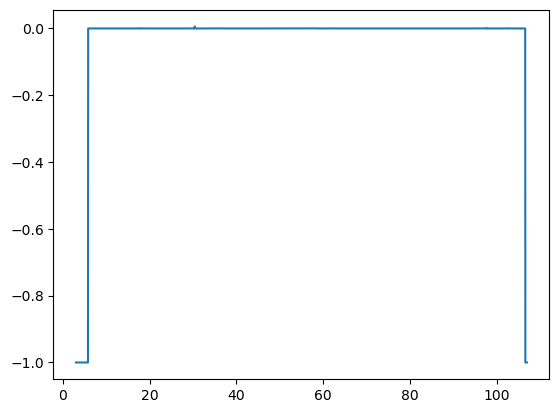

In [116]:
plt.plot(hdulist_EVS[1].data['WAVELENGTH'],hdulist_EVS[3].data['IRRADIANCE'][162])

### EVL Line

In [41]:
hdulist_EVL=fits.open(EVL_filename,output_verify='exception',mode='readonly')
hdulist_EVL.info()

Filename: data\EVE\EVL_L2_2011027_16_007_02.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  LinesMeta     1 BinTableHDU     45   39R x 7C   [E, E, E, E, 8A, 5A, 13A]   
  2  BandsMeta     1 BinTableHDU     31   20R x 4C   [13A, 4A, E, E]   
  3  DiodeMeta     1 BinTableHDU     28   6R x 3C   [25A, 6A, 5A]   
  4  QuadMeta      1 BinTableHDU     26   4R x 2C   [2A, 3A]   
  5  LinesData     1 BinTableHDU    114   360R x 19C   [D, J, D, B, B, 39E, 39E, 39E, 20E, 20E, 20E, 6E, 6E, 6E, 6E, 4E, 4E, 4E, 4E]   
  6  LinesDataUnits    1 BinTableHDU     58   1R x 19C   [87A, 62A, 65A, 49A, 81A, 171A, 18A, 17A, 242A, 18A, 17A, 59A, 72A, 18A, 66A, 135A, 72A, 49A, 75A]   


In [49]:
hdulist_EVL[5].data[0]

(1674835241.7794237, 2011027, 57607.779423713684, 0, 16, array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
      dtype=float32), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
      dtype=float32), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
      dtype=float32), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.], dtype=float32), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -

## rough draft

before I point out scource='aia'

error was like: KeyError: 'telescop'

In [11]:
with fits.open(EVE_filename, mode='update') as hdulist:
    hdulist[3].header['TELESCOP']=hdulist[3].header['TELESCOP'].strip()
    hdulist[3].header['INSTRUME']=hdulist[3].header['INSTRUME'].strip()
    # print(hdulist[1].header)
    hdulist[1].header['TELESCOP']='SDO/EVE'

In [16]:
with fits.open(EVE_filename, mode='update') as hdulist:
    hdulist[1],hdulist[3]=hdulist[3],hdulist[1]

In [48]:
hdulist=fits.open(EVE_filename,output_verify='exception',mode='readonly')
hdulist_copy=fits.open(EVE_filename,output_verify='exception',mode='readonly')
hdulist.info()

Filename: data\EVE\EVS_L2_2011027_16_007_02.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SpectrumMeta    1 BinTableHDU     29   5200R x 2C   [E, E]   
  2  SpectrumUnits    1 BinTableHDU     40   1R x 10C   [87A, 68A, 65A, 55A, 87A, 39A, 149A, 61A, 122A, 53A]   
  3  Spectrum      1 BinTableHDU     92   360R x 10C   [D, J, D, B, B, D, 5200E, 5200E, 5200E, 5200B]   


In [ ]:
fits.writeto('output_file.fits', data, header, overwrite=True)

In [64]:
hdulist.close()

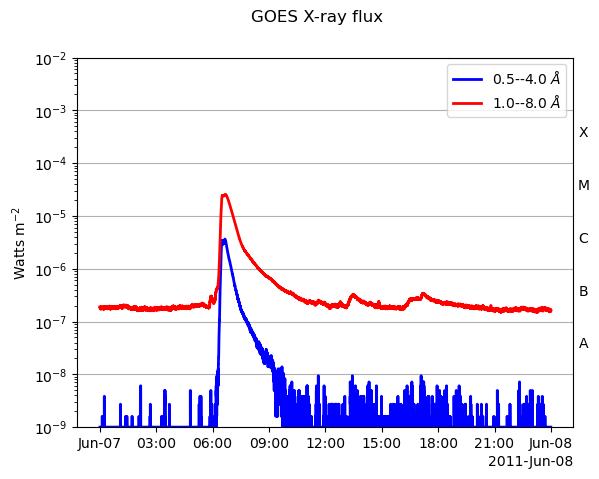

In [1]:
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

my_timeseries = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_timeseries.peek()

In [2]:
type(my_timeseries)

sunpy.timeseries.sources.goes.XRSTimeSeries